In [26]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

from sed_simple_generator import skycoords

In [2]:
sys.path.append("dev/")
from dev.dustmap_handler import DustMap

In [3]:
import dustmaps.bayestar
from dustmaps.config import config
config['data_dir'] = '/Users/ratzenboe/Documents/programs/pythonProject/dustmap_data/'

In [64]:
import healpy as hp
import astropy.units as u
from astropy.coordinates import SkyCoord

# Define the number of pixels in the HEALPix map (NSIDE parameter)
nside = 128
npix = hp.nside2npix(nside)

# Get the coordinates of the center of each pixel in the HEALPix map
l, b = hp.pix2ang(nside, np.arange(npix), lonlat=True)
coords = SkyCoord(
    l*u.deg, b*u.deg,
    distance=1.2*u.kpc,
    frame='galactic'
)

In [66]:
?hp.nside2npix

In [65]:
npix

196608

In [34]:
map_base_path = '/Users/ratzenboe/Documents/work/data_local/dustmap_data/'
# map_fname_planck =  #HFI_CompMap_ThermalDustModel_2048_R1.20.fits'
# map_fname_edenhofer = '/Users/ratzenboe/Documents/work/data_local/dustmap_data/' #mean_and_std_healpix.fits'
# map_fname_bayestar = '/Users/ratzenboe/Documents/work/data_local/dustmap_data/' #bayestar2019.h5'

# Download dustmaps

In [32]:
# import dustmaps.bayestar
# dustmaps.bayestar.fetch()

In [49]:
# 2D extinction map at infty
dm_plk = DustMap('planck', map_base_path)
plk_conversion_to_Av = lambda map_values, Rv: Rv * map_values
# Edenhofer+2023
dm_edh = DustMap('edenhofer', map_base_path)
edh_conversion_to_Av = lambda map_values, Rv=None: map_values * 2.8
# Bayestar map with |l|<20 deg
dm_bs = DustMap('bayestar', map_base_path, version='bayestar2019')
bs_conversion_to_Av = lambda map_values, Rv=None: 2.742 * map_values

Integrating extinction map (this might take a couple of minutes)...
Optimizing map for querying (this might take a couple of seconds)...


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 22.644 s
  pix_info:   0.300 s
   samples:  11.994 s
      best:   2.498 s
       nan:   0.008 s
      sort:   7.777 s
       idx:   0.066 s


In [53]:
map_values_plk = plk_conversion_to_Av(dm_plk._dustmap.query(coords, **dm_plk.query_kwargs), 3.1)
map_values_edh = edh_conversion_to_Av(dm_edh._dustmap.query(coords, **dm_edh.query_kwargs), 3.1)
map_values_bs = bs_conversion_to_Av(dm_bs._dustmap.query(coords, **dm_bs.query_kwargs), 3.1)

In [62]:
coords.distance

<Distance [1.2, 1.2, 1.2, ..., 1.2, 1.2, 1.2] kpc>

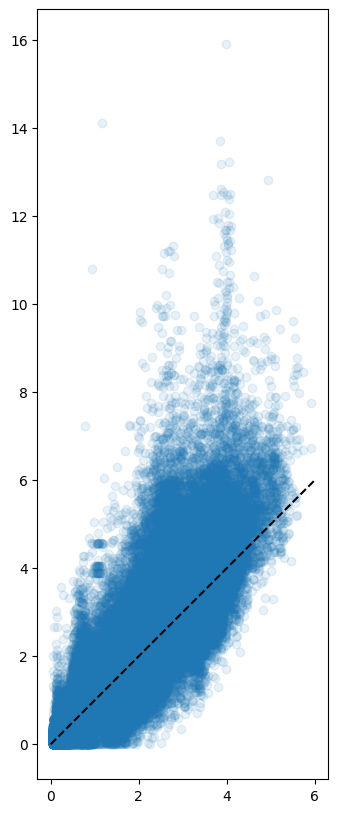

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(map_values_edh, map_values_bs, alpha=0.1)
plt.plot([0, 6], [0, 6], c='k', ls='--')
# same axis aspect ratios
plt.gca().set_aspect('equal')

In [39]:
# data_plk = dm_plk.transform({'skycoords': coords, 'Rv': 3.1})
# data_edh = dm_edh.transform({'skycoords': coords})
# data_bs = dm_bs.transform({'skycoords': coords})

dm_plk.transform(skycoords=coords)

TypeError: DustMap.transform() got an unexpected keyword argument 'skycoords'

In [8]:
np.percentile(data_plk['A_V'], 99.5)

27.790718421935143

# Compute differences

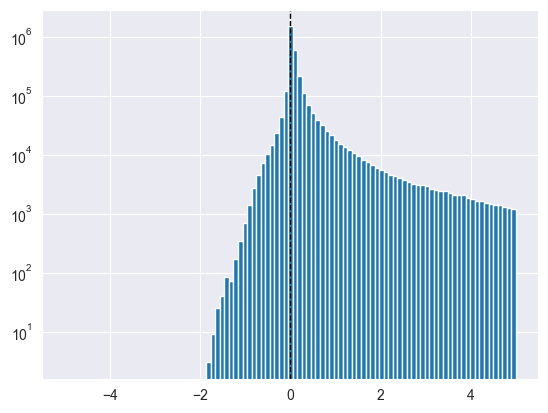

In [35]:
ref_dm = data_plk['A_V']
comparison_dm = data_edh['A_V']

diff = ref_dm - comparison_dm
plt.hist(diff, bins=np.linspace(-5, 5, 100), log=True)
plt.axvline(0, color='k', lw=1, ls='--')
plt.show()

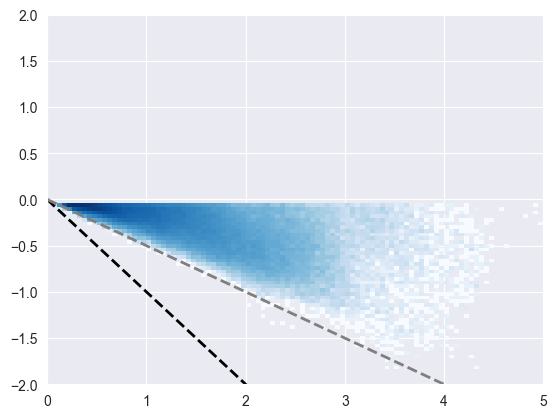

In [36]:
th = -0.05
err = diff < th
plt.hist2d(comparison_dm[err], diff[err], bins=100, range=((0, 5), (-2, 2)), cmap='Blues', norm='log')
# plt.scatter(data_edh['A_V'][err], diff[err], s=5, alpha=0.002)

# plot 1:1 line
x = np.linspace(0, 5, 100)
plt.plot(x, -x, color='k', lw=2, ls='--')
plt.plot(x, -x/2, color='tab:grey', lw=2, ls='--')

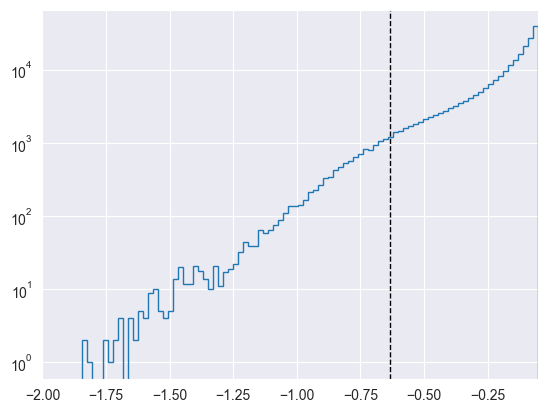

In [37]:
# plot cdf of diff
plt.hist(diff[err], bins=np.linspace(-2, th, 100), cumulative=False, density=False, histtype='step', lw=2, log=True)
plt.xlim(-2, th)
plt.axvline(np.percentile(diff[err], 5), color='k', lw=1, ls='--')

(-2.0, 0.01)

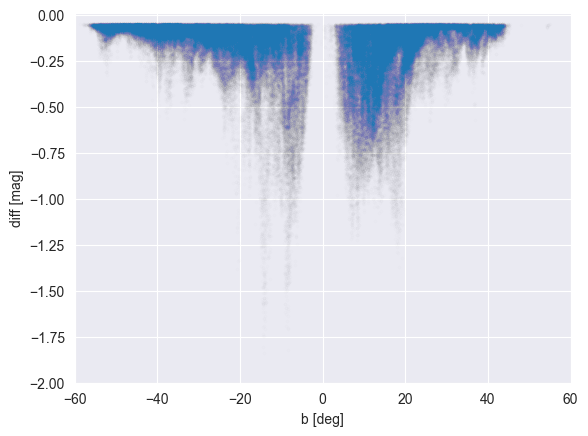

In [39]:
plt.scatter(b[err], diff[err], s=5, alpha=0.002)
# plt.axvline(10, color='k', lw=1, ls='--')
# plt.axvline(-10, color='k', lw=1, ls='--')
plt.xlabel('b [deg]')
plt.ylabel('diff [mag]')
plt.xlim(-60, 60)
plt.ylim(-2, 0.01)

(-2.0, 0.01)

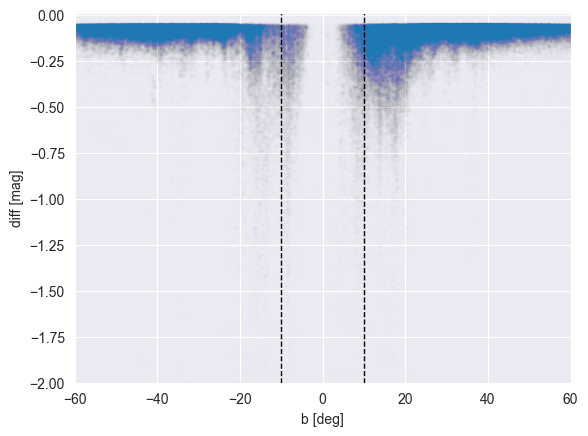

In [33]:
plt.scatter(b[err], diff[err], s=5, alpha=0.002)
plt.axvline(10, color='k', lw=1, ls='--')
plt.axvline(-10, color='k', lw=1, ls='--')
plt.xlabel('b [deg]')
plt.ylabel('diff [mag]')
plt.xlim(-60, 60)
plt.ylim(-2, 0.01)